In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/gun_violence.csv')

In [3]:
df.head()

,Unnamed: 0,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
0,0,"November 26, 2016",Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult
1,1,"November 26, 2016",Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult
2,2,"November 24, 2016",New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult
3,3,"November 24, 2016",Florida,Black Point,NaN,1,0,NaN,Accidental,Adult
4,4,"November 23, 2016",Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult


Convert `Incident Date` to a datetime object

In [4]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

Drop `Unnamed` column

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult


# Audience

# Claim

<hr style="height:0;border:1px solid #ececec" />

# Setting up color palette

We first begin by setting a color palette for the visualization so that all our referencing for the Categories will be consistent.

Using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4), we determine a color palette that is photovopy safe.

In [290]:
df.Category.unique()

[[array(['Accidental', 'Intentional', 'Mass Shootings',
         'Police Involvement'], dtype=object)]]

In [296]:
palette = alt.Scale(domain=['Accidental', 'Intentional', 'Mass Shootings','Police Involvement'], \
                  range=['#2b83ba', '#fdae61', '#abdda4','#d7191c'])

<hr/>

# To support our claim, we have developed the following visualizations:

## 1. Injuries and deaths and the correlation to its category?

In [7]:
df1 = df.copy()

What is the next line supposed to do?

In [ ]:
df1[df1.duplicated(['Incident Date','Address'])].sort_values(['Incident Date', 'Address'], ascending=True)

In [8]:
df1 = df1.set_index(['Incident Date','Address']).sort_values('Incident Date', ascending=True)
df1.head(100)

State  \
Incident Date Address                                                         
2014-01-01    Rockingham Street and Berkley Avenue Extended        Virginia   
              1347 Brumfield Rd SW                              Mississippi   
              800 Growth Avenue                                     Indiana   
              Highway 301                                    South Carolina   
              1347 Brumfield Rd SW                              Mississippi   
2014-01-02    200 block of Hustosky Road                       Pennsylvania   
2014-01-03    Farmers Boulevard and 133rd Avenue                   New York   
2014-01-07    1600 block of N Maple                              California   
2014-01-11    1187 Greene Rd 336                                   Arkansas   
              3600 block of Highway 80 W                          Louisiana   
              Southeast Stark and 99th                               Oregon   
              Southeast Marie                                        Oregon   
2014-01-12    NaN                                                 Louisiana   
              University Drive                                      Alabama   
              300 block of North Street                            Illinois   
2014-01-13    800 block of Calvert St                              Michigan   
2014-01-14    West 86th Street                                   California   
2014-01-16    NaN                                                  Oklahoma   
              Dysart and Indian School                              Arizona   
              37 N. 630 West                                           Utah   
2014-01-17    Turner Avenue                                      California   
2014-01-20    8509 Rixlew Ln                                       Virginia   
              3100 block of Cotton Place                            Alabama   
2014-01-21    2930 South Hanna Street                               Indiana   
              Springfield Avenue                                 New Jersey   
2014-01-24    8100 block of East Misty Morning Place               Oklahoma   
2014-01-25    S. Union Av and W. 51st St                           Illinois   
              600 block of Covenant Drive                           Florida   
              1100 block of highway 31                                Texas   
2014-01-27    Edwards Street                                 North Carolina   
...                                                                     ...   
2014-03-01    1500 block of Fairfield Dr                            Florida   
              NaN                                                  Oklahoma   
              NaN                                                     Texas   
              28615 Rock Ridge Dr                                  Illinois   
              12800 block of Gotham                                   Texas   
              NaN                                              Pennsylvania   
2014-03-03    NaN                                                   Arizona   
2014-03-05    2600 block of Wealthy Street                          Alabama   
               31000 block of Wolfskill Avenue                   California   
               31000 block of Wolfskill Avenue                   California   
              Law Street                                     South Carolina   
              2600 block of Wealthy Street                          Alabama   
2014-03-07    Tamar Ct                                                 Ohio   
2014-03-08    4900 West Race Ave                                   Illinois   
              1600 block of First Street                         California   
2014-03-09     4900 block of West Race Avenue                         Texas   
              531 W State St                                           Ohio   
2014-03-10    SE 3144                                                 Texas   
              SE 3144                    

Assigning binary values to killed and injured

In [9]:
df1['Death'] = df1['# Killed'].apply(lambda x: 0 if x == 0 else 1)

In [10]:
df1['Injury'] = df1['# Injured'].apply(lambda x: 0 if x == 0 else 1)

In [11]:
df2 = df1.groupby(['Incident Date','Category']).sum().reset_index()

In [12]:
df2.head(20)

,Incident Date,Category,# Killed,# Injured,Operations,Death,Injury
0,2014-01-01,Accidental,2,2,0.0,2,2
1,2014-01-01,Mass Shootings,2,2,0.0,1,1
2,2014-01-02,Accidental,1,0,0.0,1,0
3,2014-01-03,Mass Shootings,1,3,0.0,1,1
4,2014-01-07,Accidental,0,2,0.0,0,1
5,2014-01-11,Accidental,1,1,0.0,1,1
6,2014-01-11,Mass Shootings,0,11,0.0,0,2
7,2014-01-12,Mass Shootings,0,16,0.0,0,3
8,2014-01-13,Mass Shootings,0,4,0.0,0,1
9,2014-01-14,Mass Shootings,0,4,0.0,0,1


In [13]:
source = df2

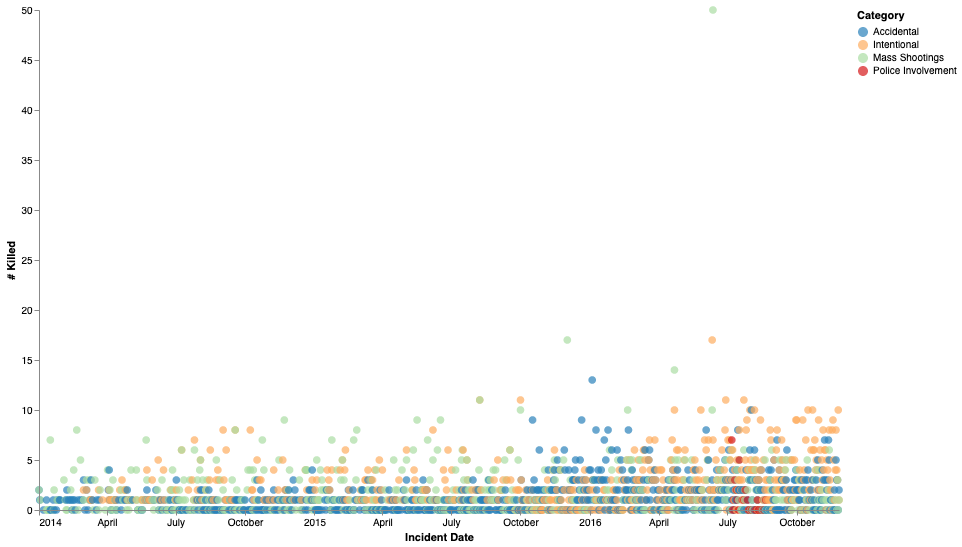

In [297]:
chart = alt.Chart(source).mark_circle(size = 60).encode(
    x = 'Incident Date',
    y = '# Killed',
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 800,
    height = 500
)

### Narrative
We were interested in the correlation between gun incident types and the category associated. This visualization is able to show the amount of killings per category over the range of dates in the data set. From here we can visually see that intentional incidents occur most often in the 5 to 10 death range, while accident incidents occur with 1 to 2 deaths most often. Hovering over each incident will give the category, date, injuries, and death.


### Data Wrangling
1. Delete duplicates from the data set
2. Drop unneeded columns
3. Group by Data and category to acquire the sum of these category's statistics

### Road Map
1. Include Age in the analysis
2. Include Injuries in a better way than tooltips to the visualization

## 2. Is there seasonality to gun violence?

We look at the pattern for each incident category

In [44]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

In [45]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult


In [184]:
df_seasonality['Period'] = df_seasonality.Date.apply(lambda x: x.to_period("Q").to_timestamp())

In [185]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age,Period,Quarter
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult,2016-10-01,2016Q4
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult,2016-10-01,2016Q4
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult,2016-10-01,2016Q4
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult,2016-10-01,2016Q4
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult,2016-10-01,2016Q4


In [186]:
df_seasonality.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

In [190]:
seasonality = df_seasonality.groupby(['Period', 'Category'], as_index=False)['Date'].count().rename(columns={'Date':'Count'})

In [191]:
seasonality.head()

,Period,Category,Count
0,2014-01-01,Accidental,54
1,2014-01-01,Intentional,9
2,2014-01-01,Mass Shootings,50
3,2014-04-01,Accidental,52
4,2014-04-01,Intentional,40


### Overall seasonality of gun violence in the United States between 2014 - 2016

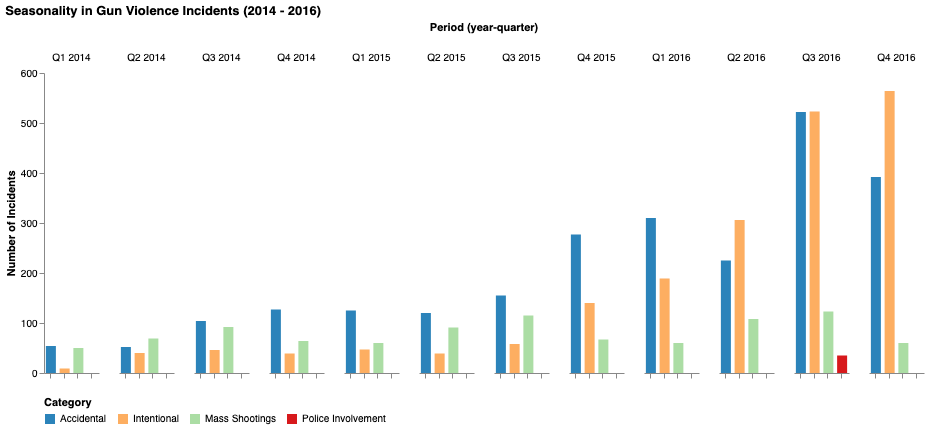

In [327]:
chart = alt.Chart(seasonality, title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Period', timeUnit='yearquarter'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 55
).configure_legend(
     orient = "bottom"
)

### Visualizing by individual categories

Visualizing the trend for Accidental Gun Violence Incidents

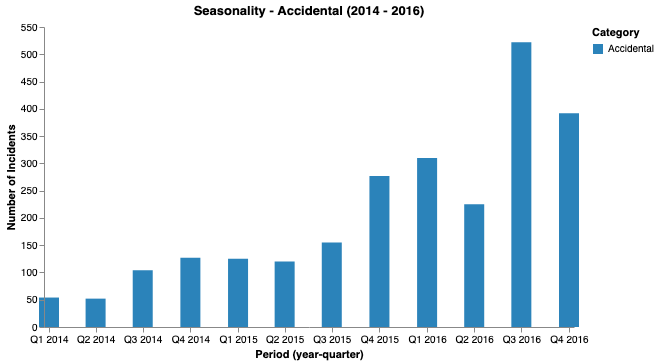

In [300]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Accidental'], title='Seasonality - Accidental (2014 - 2016)', name='seasonality_accidental') \
        .mark_bar(size=20, color='#1f77b4') \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#2b83ba'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
).display()

Visualizing the trend for Intentional Gun Violence Incidents

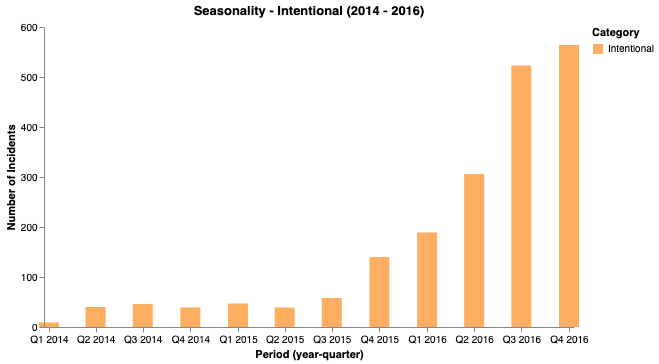

In [321]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Intentional'], title='Seasonality - Intentional (2014 - 2016)', name='seasonality_intentional') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#fdae61'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
).display()

Visualizing the trend for Mass Shootings Gun Violence Incidents

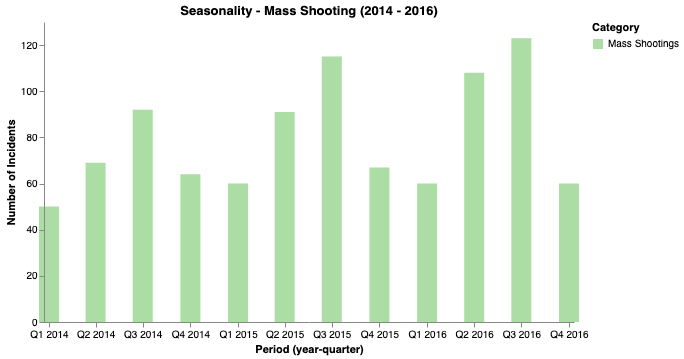

In [322]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Mass Shootings'], title='Seasonality - Mass Shooting (2014 - 2016)', name='seasonality_mass') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#abdda4'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
).display()

Visualizing the trend for Police Involvement Gun Violence Incidents

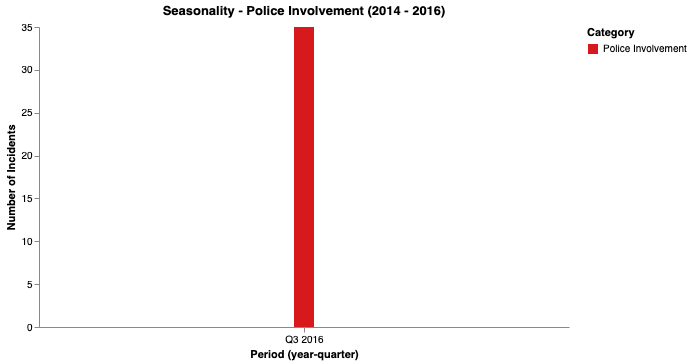

In [323]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Police Involvement'], title='Seasonality - Police Involvement (2014 - 2016)', name='seasonality_police') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#d7191c'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
).display()

### Narrative

Looking at the charts, we can see that:
<ol>
    <li>There is an increasing trend to gun violence incidents in the United States between 20014 - 2018.</li>
    <li>There is a sudden spike in 2016 Q3 in Accidental and Intentional incidents from previous quarters.</li>
    <li>There is a higher occurence of Mass Shootings in Q3 compared to other quarters in all years.</li>
    <li>Accidental gun violence incidents are more common in the second half (July - December) of the year.</li>
    <li>Beginning March 2014, there is at least 1 reported incident of gun violence in the United States each month.</li>
</ol>
    

## 3. Frequency of police involvement in acts of gun violence?

# Conclusion

# Future Work